In [43]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Reduced Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$


- Function RIT computes the reduced inertia tensor

In [186]:
def RIT(XYZ, q, s):
    I = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2 + XYZ[1,n]**2/q**2 + XYZ[2,n]**2/s**2)
                Xi = sum(XYZ[i,n])
                Xj = sum(XYZ[j,n])
                XX[n] = Xi * Xj / d**2
            I[i][j] = sum(XX)
    return I

In [198]:
def one_tensor(x, y, z):
    N = len(X)
    XYZ = zeros([3,N])
    XYZ[0,:] = X
    XYZ[1,:] = Y
    XYZ[2,:] = Z
    return XYZ

In [ ]:
def sphere(n_points):
    phi = random.rand(n_points) * 2*pi
    theta = random.rand(n_points) * 2 - 1
    R = random.rand(n_points)
    X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.0) * cos(arccos(theta))
    return X, Y, Z

def cube(n_points, theta):
    X = (random.rand(n_points) * 2.0 - 1.0)  
    Y = random.rand(n_points) * 2.0 - 1.0
    Z = (random.rand(n_points) * 20.0 - 10.0) 
    X =  X  
    Y =  cos(theta) * Y - sin(theta) * Z
    Z =  sin(theta) * Y + cos(theta) * Z
    return X, Y, Z

In [196]:
def projection(x, y, z):
    figure(figsize=(14, 6))
    subplot(1, 3, 1)
    scatter(x, y, s=1)
    #xlim(min(x), max(x))
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    scatter(x, z, s=1)
    #xlim(min(x), max(x))
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    scatter(y, z, s=1)
    #xlim(min(x), max(x))
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)

In [202]:
def shape(XYZ, tol):
    old_q = 1.2
    old_s = 1.2
    new_q = 1.0
    new_s = 1.0 

    
    while((abs(new_s - old_s) > tol) & (abs(new_q - old_q) > tol)):
        old_s = new_s
        old_q = new_q
        I_test = RIT(XYZ, old_q, old_s)
        eival, evec = eig(I_test)
        oeival = sort(eival)
        XYZ = dot(evec.T, XYZ)
        #print oeival
        la = oeival[2]
        lb = oeival[1]
        lc = oeival[0]
        new_s = np.sqrt(lc/la)
        new_q = np.sqrt(lb/la)
        #print Ixy, Ixz, Iyx, Iyz, Izx, Izy
    return new_s, new_q, XYZ 


In [189]:
x, y, z = cube(500, pi/4.0)

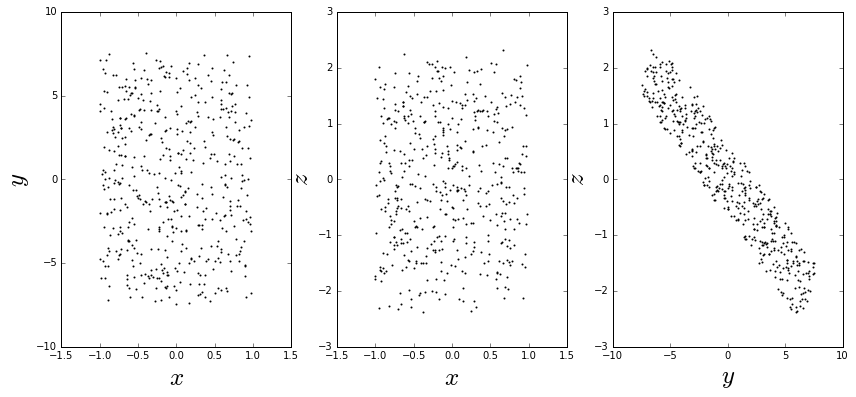

In [197]:
projection(x, y, z)

- The eigenvalues represents the axis ratios of the new set of principal axis. These values are related with $s$ and $q$
- The eigenvectors gives the Rotation to allign the halo with the principal axis.

In [199]:
cube_xyz = one_tensor(x, y, z)
I_test = RIT(cube_xyz, 1, 1)

In [200]:
eival, evec = eig(I_test)
print evec
print eival

[[ -9.99693261e-01  -2.47664919e-02  -6.91802192e-05]
 [ -6.84893591e-03   2.79137788e-01  -9.60226633e-01]
 [ -2.38007559e-02   9.59931621e-01   2.79221790e-01]]
[  4205.5491155    2264.87610504  43529.57477946]


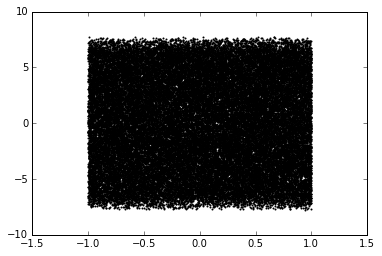

In [185]:
N = n_points
XYZ = zeros([3,N])
XYZ[0,:] = X
XYZ[1,:] = Y
XYZ[2,:] = Z
NEWR = dot(evec.T, XYZ)
scatter(X, Y, s=1)

(-15, 15)

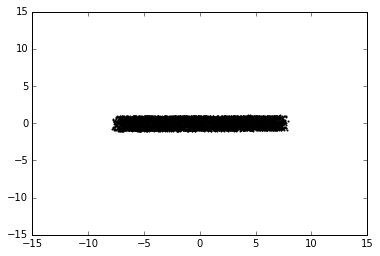

In [144]:
scatter(NEWR[0,:], NEWR[1,:], s=1)
xlim(-15, 15)
ylim(-15, 15)

In [203]:
%timeit s, q, R = shape(cube_xyz, 5E-7)
print s, q

1 loops, best of 3: 49.3 s per loop
0.0982006196493 0.120502505778


(-1.5, 1.5)

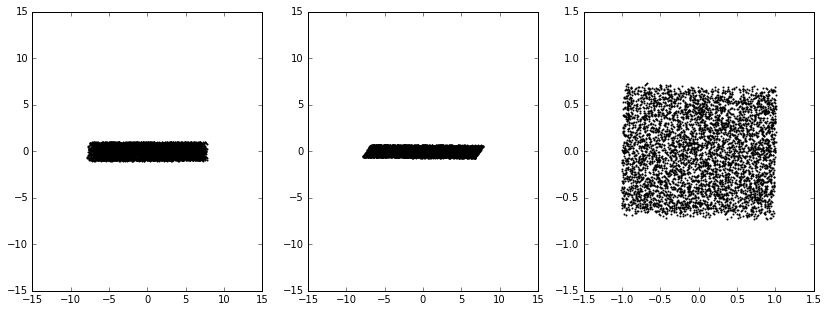

In [179]:
figure(figsize=(14, 5))
subplot(1, 3, 1)
scatter(R[0,:], R[1,:], s=1)
xlim(-15, 15)
ylim(-15, 15)
subplot(1, 3, 2)
scatter(R[0,:], R[2,:], s=1)
xlim(-15, 15)
ylim(-15, 15)
subplot(1, 3, 3)
scatter(R[1,:], R[2,:], s=1)
xlim(-1.5, 1.5)
ylim(-1.5, 1.5)

In [204]:
def circle(a, b, c):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = 10 * np.outer(np.cos(u), np.sin(v))
    y = 10 * np.outer(np.sin(u), np.sin(v))
    z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

In [205]:
x_c, y_c, z_c = circle(1, 1, 1)

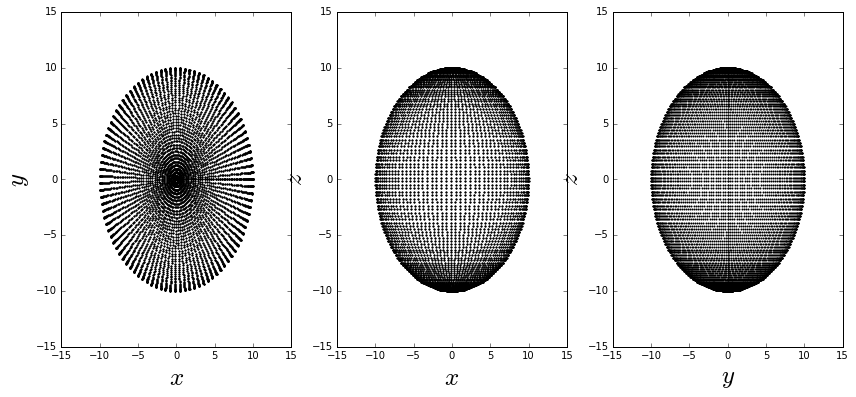

In [206]:
projection(x_c, y_c, z_c)

In [207]:
from matplotlib.patches import Ellipse

In [208]:
Ellipse?

In [213]:
E = Ellipse((0, 0),width = 2, height =  1)
print E

Ellipse(0,0;2x1)


TypeError: float() argument must be a string or a number

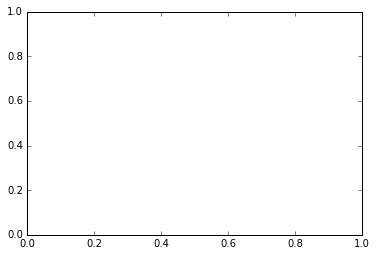

In [215]:
contour(E)